In [2]:
# Importando las bibliotecas necesarias
import yfinance as yf
import pandas as pd

# Definir el ticker para Bitcoin
ticker = 'BTC-USD'

# Crear el objeto de datos
data = yf.Ticker(ticker)
# Obtener datos históricos desde el inicio hasta la fecha actual
hist_full = data.history(period="1d", start="2010-01-01")
# Calculando el precio promedio como el promedio de Apertura, Máximo, Mínimo y Cierre
hist_full['Average_Price'] = hist_full[['Open', 'High', 'Low', 'Close']].mean(axis=1)
# Seleccionando solo las columnas 'Date' y 'Average_Price'
bitcoin_avg_price_full = hist_full[['Average_Price']]
# Cambiando el formato del índice (timestamp) para que solo tenga la fecha
bitcoin_avg_price_full.index = bitcoin_avg_price_full.index.date
time = bitcoin_avg_price_full.index.astype(str).tolist()
price = bitcoin_avg_price_full['Average_Price'].values



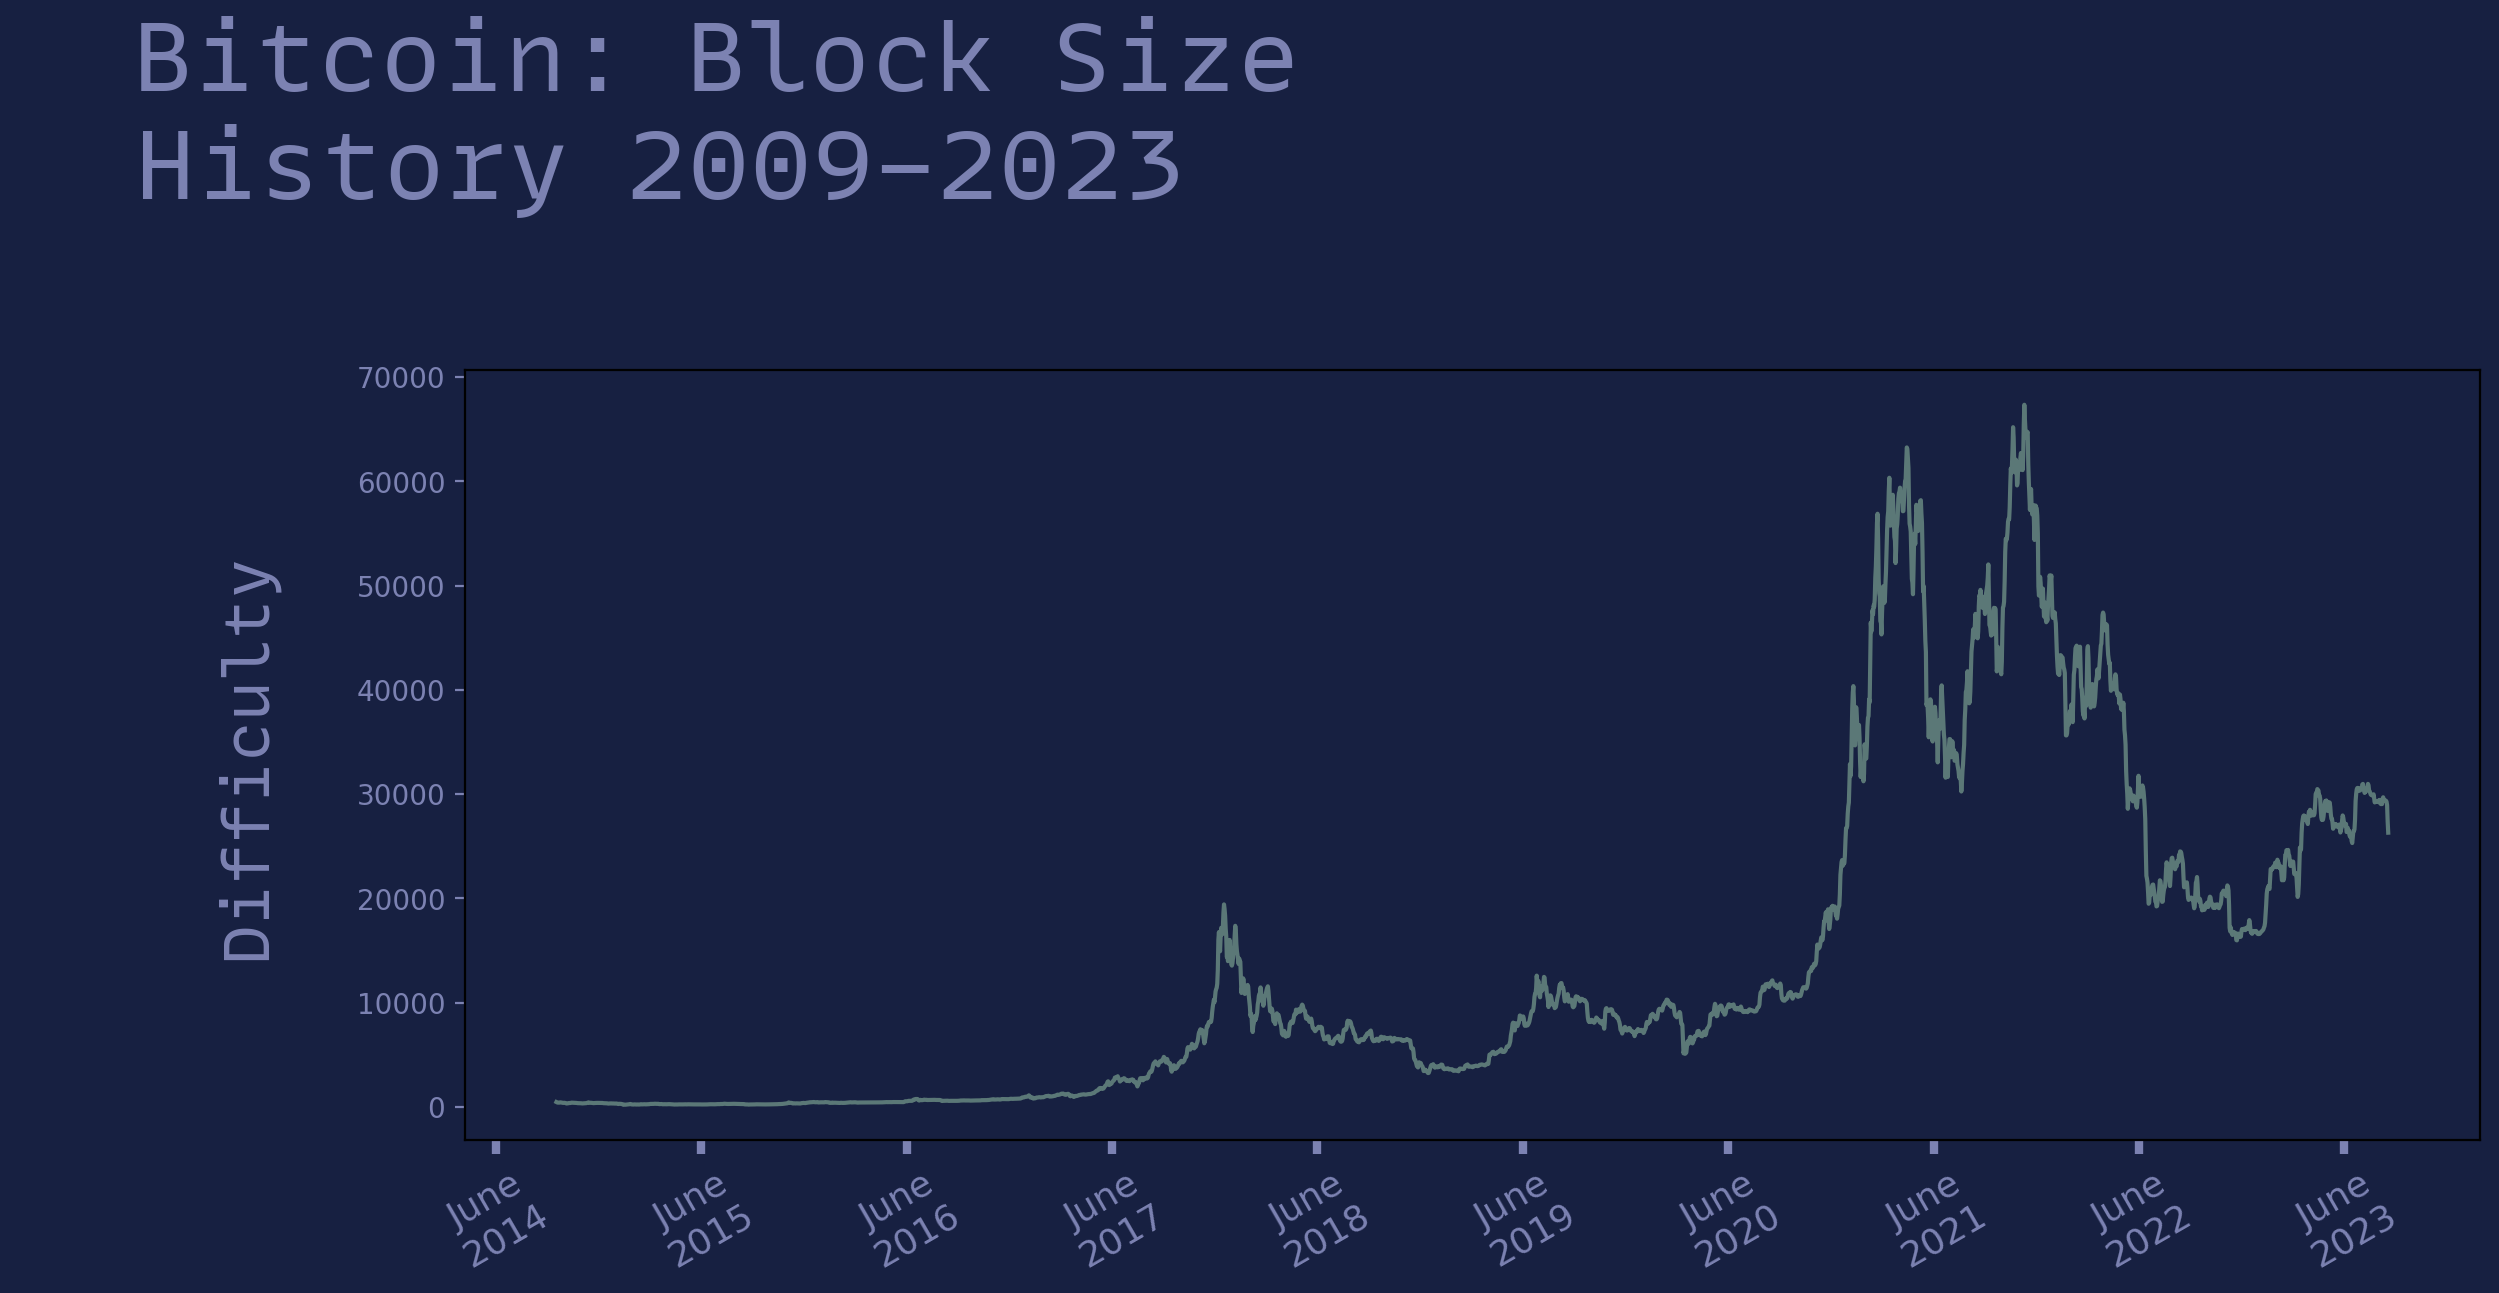

<Figure size 640x480 with 0 Axes>

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import font_manager as fm
from PIL import Image
from datetime import datetime
from app.styles import Estilos, colores
from app.readata import leer_data,time_data,estado_data,last_block

# Cambiar la tipografia
fpath = os.path.join('bins/MonoLisaSimpson.ttf')
prop = fm.FontProperties(fname=fpath)
fname = os.path.split(fpath)[1]

tipo='estilo_dark'

time = time_data(time)
if tipo[7:8]=='d':
    tw1 = Image.open('bins/br_w.png')
else:
    tw1 = Image.open('bins/br_d.png')


tw1_resized = tw1.resize((int(tw1.width * 0.5), int(tw1.height * 0.5)))  # Reduce el tamaño de la imagen a la mitad
# Convierte la imagen de PIL a una matriz de numpy para que matplotlib pueda trabajar con ella
tw1_array = np.array(tw1_resized)

fig, ax = plt.subplots(figsize=(13,5), dpi=200)
fig.patch.set_facecolor(Estilos[tipo][1])
ax.patch.set_facecolor(Estilos[tipo][1])

preferencias = {'color':Estilos[tipo][0],'fontproperties':prop}
plt.suptitle("  Bitcoin: Block Size\nHistory 2009-2023",fontsize=35,x=0.20,y=1.23,**preferencias)
 
locator = mdates.MonthLocator(interval=12)
formatter = mdates.DateFormatter('%B\n%Y')
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(labelsize=13, rotation=30,length=5,width=3)
ax.tick_params(axis='both',colors=Estilos[tipo][0])
ax.set_ylabel('Difficulty\n', fontsize=23,**preferencias)
 
ax.plot(time,price,color=colores[3])

tw1_resized = tw1.resize((int(tw1.width * 0.5), int(tw1.height * 0.5)))  # Reduce el tamaño de la imagen a la mitad
# Convierte la imagen de PIL a una matriz de numpy para que matplotlib pueda trabajar con ella
tw1_array = np.array(tw1_resized)


fig.figimage(tw1_array, xo=1500, yo=1050, alpha=0.55, zorder=1)
plt.subplots_adjust(wspace=0.3, hspace=1)
plt.show()
plt.savefig('analisis/resultados/price'+tipo+'.png',bbox_inches='tight',pad_inches=0.5)



